<a href="https://colab.research.google.com/github/segunolujemibola/WORKINGWITHCOLAB/blob/main/crime_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, csv
%matplotlib inline

In [ ]:
filename = "data.csv"

In [ ]:
if not filename in os.listdir():
    from google.colab import auth
    auth.authenticate_user()
    from googleapiclient.discovery import build
    drive_service = build('drive', 'v3')

    file_id = "1-H9j2B35-AEbudDflLZW9PKt9Sr2UAFE"

    import io
    from googleapiclient.http import MediaIoBaseDownload

    request = drive_service.files().get_media(fileId=file_id)
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    done = False
    while done is False:
        # _ is a placeholder for a progress object that we ignore.
        # (Our file is small, so we skip reporting progress.)
        _, done = downloader.next_chunk()

    downloaded.seek(0)
    with open(filename, "wb") as file:
        file.write(downloaded.read())
        file.flush()

In [ ]:
# Reading data from remote link
file = open(filename)

# use the first 2 lines of the file to detect separator
temp_lines = file.readline() + '\n' + file.readline()
dialect = csv.Sniffer().sniff(temp_lines, delimiters=';,')

# remember to go back to the start of the file for the next time it's read
file.seek(0) 

df = pd.read_csv(file, sep=dialect.delimiter,index_col=0)
print("Data imported successfully")

df.head()

Data imported successfully


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [ ]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"
2278725,3409804,HK420105,06/09/2004 08:19:28 PM,016XX N ROCKWELL ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,1.0,24.0,18,1158782.0,1910845.0,2004,02/28/2018 03:56:25 PM,41.911094,-87.692123,"(41.91109424, -87.692122762)"


In [ ]:
df.shape

(2278726, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278726 entries, 0 to 2278725
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
df.isna().sum()

ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [ ]:
pd.crosstab(df['Year'], df['Primary Type'])

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,295,9452,28173,7833,0,536,16897,10,3981,4399,...,8912,1766,2,835,3,5548,655,65,29956,1248
2002,277,9613,28151,7518,0,539,16986,6,4278,4085,...,9779,1855,1,728,1,5470,618,68,29225,1322
2003,292,8808,26465,7565,0,476,16406,7,4463,4087,...,9329,1814,2,736,1,5188,613,74,29779,1279
2004,235,8718,26502,7353,0,467,15958,11,4777,3987,...,8693,2235,2,724,1,4833,560,73,28486,1320
2005,206,8113,24992,7635,0,456,16469,17,4931,4023,...,8339,1779,3,769,2,4807,548,59,25786,1194
2006,221,7844,24198,7306,0,434,17266,13,4421,4121,...,8110,2157,1,877,1,4808,432,48,25911,1179
2007,239,7902,23816,7453,0,459,16013,11,4125,4168,...,7969,1837,0,1012,1,4686,440,62,25464,1081
2008,205,7424,22702,7931,0,463,15796,5,3677,4474,...,7933,1537,3,910,0,5039,459,61,26549,1132
2009,197,6938,20757,8114,0,420,14371,12,3243,4205,...,7748,1237,5,964,0,4738,355,46,24254,1219


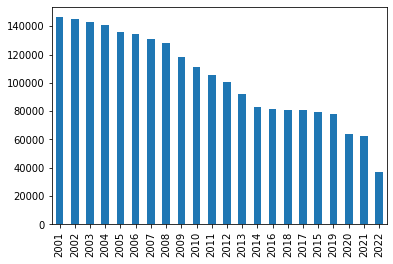

In [ ]:
df['Year'].value_counts().plot.bar()

In [ ]:
df.nunique()

ID                      2278726
Case Number             2278678
Date                    1343546
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Year                         22
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

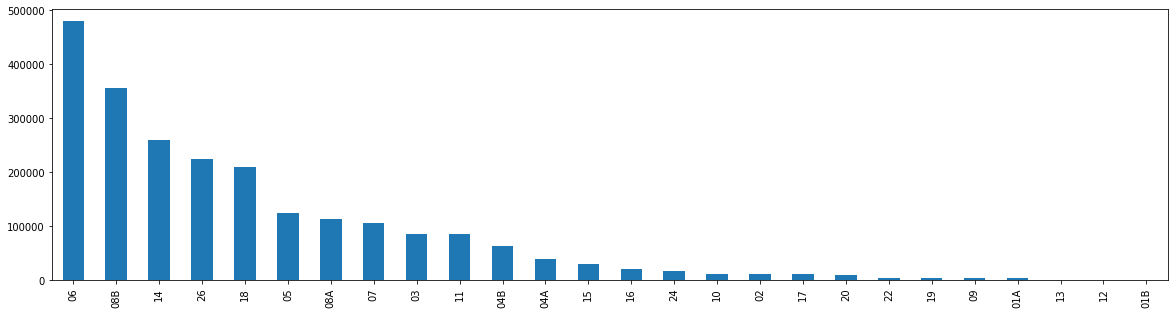

In [ ]:
df['FBI Code'].value_counts().plot.bar(figsize= (20,5))

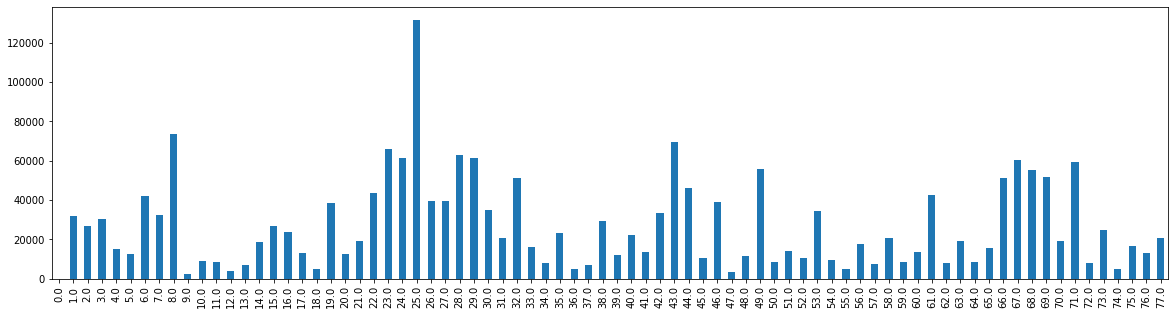

In [ ]:
df['Community Area'].value_counts().sort_index().plot.bar(figsize= (20,5))

In [ ]:
df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'THEFT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT',
       'HOMICIDE', 'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'ARSON', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'OBSCENITY', 'NON - CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [ ]:
pd.crosstab(df['Primary Type'], df['Arrest'])

Arrest,False,True
Primary Type,,
ARSON,3415,471
ASSAULT,115638,32028
BATTERY,326028,92623
BURGLARY,118163,7000
CONCEALED CARRY LICENSE VIOLATION,7,298
CRIM SEXUAL ASSAULT,7064,1299
CRIMINAL DAMAGE,242333,17629
CRIMINAL SEXUAL ASSAULT,1466,125
CRIMINAL TRESPASS,18756,44743


In [ ]:
(df['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT').sum()

1591

In [ ]:
(df['Primary Type'] == 'NON-CRIMINAL').sum()

48

In [ ]:
(df['Primary Type'] == 'NON - CRIMINAL').sum()

12

In [ ]:
(df['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)').sum()

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278726 entries, 0 to 2278725
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


In [ ]:
df.isnull().sum()

ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [ ]:
#Making a copy of the original Dataset
df_clean = df.copy()

In [ ]:
#### Reapeted
#### A similar code has been done to drop the unwanted columns . Count 5 code cells from this one. 

dfSub = df_clean[['ID', 'Date', 'Block',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'District',  'Year', 'Updated On']]

In [ ]:
dfSub = dfSub[0:20000]

In [ ]:
df_clean.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### DATA CLEANING ISSUES
- Drop X Coordinate, Y Coordinate and location. The data in those columns is already represented in the Latitude and Longitude columns.
- Convert Date column to the correct datatype
- District Ward and Community Area should be converted to categorical datatype
- Year info can be found in the Date column
- Block,IUCR,Case Number
- Make a column for year, months, hour, weekdays and time_of_the day.



### Feature Engineering
- Create Violence column 

In [ ]:
violence_dict =  {
    'CRIMINAL DAMAGE': 1,
    'WEAPONS VIOLATION': 0,
    'BURGLARY': 0,
    'ASSAULT': 1,
    'THEFT': 0,
    'ROBBERY': 0,
    'NARCOTICS': 0,
    'MOTOR VEHICLE THEFT': 0,
    'BATTERY': 1,
    'OTHER OFFENSE': 0,
    'PROSTITUTION': 0,
    'DECEPTIVE PRACTICE': 0,
    'INTIMIDATION': 0,
    'INTERFERENCE WITH PUBLIC OFFICER': 1,
    'CRIMINAL TRESPASS': 0,
    'STALKING': 0,
    'OFFENSE INVOLVING CHILDREN': 0,
    'PUBLIC PEACE VIOLATION': 0,
    'SEX OFFENSE': 0,
    'CRIM SEXUAL ASSAULT': 1,
    'HOMICIDE': 1,
    'LIQUOR LAW VIOLATION': 0,
    'CRIMINAL SEXUAL ASSAULT': 1,
    'KIDNAPPING': 1,
    'ARSON': 1,
    'GAMBLING': 0,
    'CONCEALED CARRY LICENSE VIOLATION': 0,
    'PUBLIC INDECENCY': 0,
    'RITUALISM': 0,
    'OBSCENITY': 0,
    'NON - CRIMINAL': 0,
    'OTHER NARCOTIC VIOLATION': 0,
    'HUMAN TRAFFICKING': 1,
    'NON-CRIMINAL': 0,
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 0
    }

In [ ]:
# create violence column and assign values from violence_dict values
df_clean['Violence'] = df['Primary Type'].apply(lambda x: violence_dict[x])


In [ ]:
# drop cols
drop_cols = [
    'FBI Code', 'X Coordinate',
    'Y Coordinate', 'Year', 
    'Updated On','Location',
    'ID','Case Number','IUCR','Latitude','Longitude']
df_clean.drop(columns=drop_cols,axis= 1, inplace=True)


In [ ]:
# convert Date to datetime dtype
#convert  Violence, District, Ward, Community Area to Categorical Datatype
df_clean["Violence"] = pd.Categorical(df_clean["Violence"])
df_clean["District"] = pd.Categorical(df_clean["District"])
df_clean["Ward"] = pd.Categorical(df_clean["Ward"])
df_clean["Community Area"] = pd.Categorical(df_clean["Community Area"])
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [ ]:
## Making a column for year, months, hour and weekdays

df_clean['year'] = df_clean['Date'].dt.year
df_clean['months'] = df_clean['Date'].dt.month
df_clean['weekdays'] = df_clean['Date'].dt.weekday
df_clean['hour'] = df_clean['Date'].dt.hour
df_clean['weekdays'] = df_clean['weekdays'].astype(str)

## Replacing 0-6 to Monday-Sunday
for i in df_clean['weekdays']:
  if i == "0":
    df_clean['weekdays'].replace(i,"Monday",inplace = True)
  elif i == "1":
    df_clean['weekdays'].replace(i,"Tuesday",inplace = True)
  elif i == "2":
    df_clean['weekdays'].replace(i,"Wednesday",inplace = True)
  elif i == "3":
    df_clean['weekdays'].replace(i,"Thursday",inplace = True)
  elif i == "4":
    df_clean['weekdays'].replace(i,"Friday",inplace = True)
  elif i == "5":
    df_clean['weekdays'].replace(i,"Saturday",inplace = True)
  elif i == "6":
    df_clean['weekdays'].replace(i,"Sunday",inplace = True)

## Maaking a column for Time_of_the_day
bins = [0,11,15,23]
df_clean["Time_of_day"] = pd.cut(df_clean['hour'],bins=bins, labels=["Morning","Afternoon","Evening"])

display(df_clean['weekdays'].unique())


array(['Saturday', 'Tuesday', 'Friday', 'Monday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278726 entries, 0 to 2278725
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Block                 object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              category      
 9   Ward                  category      
 10  Community Area        category      
 11  Violence              category      
 12  year                  int64         
 13  months                int64         
 14  weekdays              object        
 15  hour                  int64         
 16  Time_of_day           category      
dtypes: bool(2), category(5), datetime64[ns](1), int64(4), object(5)
memory usage: 206.5+

In [ ]:
df_clean.Block.nunique()

54347

In [ ]:
df_clean.Description.nunique()

515

In [ ]:
df_clean['Location Description'].nunique()

198

In [ ]:
df_clean[['Description', 'Location Description', 'Community Area']].head(20)

,Description,Location Description,Community Area
0,TO VEHICLE,STREET,46.0
1,UNLAWFUL POSS AMMUNITION,POOL ROOM,47.0
2,FORCIBLE ENTRY,RESIDENCE,12.0
3,SIMPLE,NURSING HOME/RETIREMENT HOME,26.0
4,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),28.0
5,OVER $500,STREET,NaN
6,STRONGARM - NO WEAPON,CTA PLATFORM,25.0
7,POSS: CANNABIS 30GMS OR LESS,ALLEY,23.0
8,AUTOMOBILE,STREET,23.0
9,POSS: CANNABIS 30GMS OR LESS,POLICE FACILITY/VEH PARKING LOT,22.0


In [ ]:
df_clean.head(3)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Violence,year,months,weekdays,hour,Time_of_day
0,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,1,2008,7,Saturday,14,Afternoon
1,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,0,2018,7,Tuesday,10,Morning
2,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,0,2007,4,Friday,10,Morning


Exploring 'OTHER OFFENSE' and 'OFFENSE INVOLVING CHILIDREN'

In [ ]:
# the dictionary below contains the unique description of crimes having OTHER OFFENSE  and OFFENSE INVOLVING CHILDREN as their Primary Type
other_offenses = {'OBSCENE TELEPHONE CALLS': 0,
 'TELEPHONE THREAT': 0,
 'HARASSMENT BY TELEPHONE': 0,
 'OTHER OFFENSE': 0,
 'OTHER VEHICLE OFFENSE': 0,
 'VEHICLE TITLE/REG OFFENSE': 0,
 'VIOLATE ORDER OF PROTECTION': 0,
 'AGG SEX ASSLT OF CHILD FAM MBR': 1,
 'LICENSE VIOLATION': 0,
 'FALSE/STOLEN/ALTERED TRP': 0,
 'OTHER CRIME AGAINST PERSON': 0,
 'AGG CRIM SEX ABUSE FAM MEMBER': 1,
 'FALSE / STOLEN / ALTERED TRP': 0,
 'HARASSMENT BY ELECTRONIC MEANS': 0,
 'ENDANGERING LIFE/HEALTH CHILD': 0,
 'PAROLE VIOLATION': 0,
 'ANIMAL ABUSE/NEGLECT': 0,
 'POSSESSION OF BURGLARY TOOLS': 0,
 'CHILD ABDUCTION': 0,
 'GUN OFFENDER: DUTY TO REGISTER': 0,
 'OTHER WEAPONS VIOLATION': 0,
 'OTHER CRIME INVOLVING PROPERTY': 0,
 'GUN OFFENDER: ANNUAL REGISTRATION': 0,
 'HARBOR RUNAWAY': 0,
 'CHILD ABUSE': 0,
 'PROBATION VIOLATION': 0,
 'SEX OFFENDER: FAIL REG NEW ADD': 0,
 'VIOLATION OF CIVIL NO CONTACT ORDER': 0,
 'ANIMAL FIGHTING': 0,
 'ENDANGERING LIFE / HEALTH OF CHILD': 0,
 'VEHICLE TITLE / REGISTRATION OFFENSE': 0,
 'SEX OFFENDER: FAIL TO REGISTER': 0,
 'SEX ASSLT OF CHILD BY FAM MBR': 1,
 'GUN OFFENDER - ANNUAL REGISTRATION': 0,
 'MONEY LAUNDERING': 0,
 'VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE': 0,
 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER': 1,
 'GUN OFFENDER - DUTY TO REGISTER': 0,
 'CHILD ABANDONMENT': 0,
 'CHILD PORNOGRAPHY': 0,
 'VIOLATION OF SUMMARY CLOSURE': 0,
 'CRIM SEX ABUSE BY FAM MEMBER': 1,
 'CONTRIBUTE DELINQUENCY OF A CHILD': 0,
 'FIREARM REGISTRATION VIOLATION': 0,
 'CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER': 1,
 'CONTRIBUTE CRIM DELINQUENCY JUVENILE': 0,
 'EAVESDROPPING': 0,
 'SEX OFFENDER - FAIL TO REGISTER': 0,
 'ANIMAL ABUSE / NEGLECT': 0,
 'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER': 0,
 'TAMPER WITH MOTOR VEHICLE': 0,
 'GUN OFFENDER - DUTY TO REPORT CHANGE OF INFORMATION': 0,
 'VIO BAIL BOND: DOM VIOLENCE': 0,
 'GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION': 0,
 'SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER': 1,
 'SEX OFFENDER: PROHIBITED ZONE': 0,
 'BOARD PLANE WITH WEAPON': 0,
 'OTHER ARSON/EXPLOSIVE INCIDENT': 0,
 'CONTRIBUTE TO THE CRIMINAL DELINQUENCY OF CHILD': 0,
 'HAZARDOUS MATERIALS VIOLATION': 0,
 'SALE TOBACCO PRODUCTS TO MINOR': 0,
 'VIOLENT OFFENDER: DUTY TO REGISTER': 0,
 'SEX OFFENDER - FAIL TO REGISTER NEW ADDRESS': 0,
 'ARSONIST - ANNUAL REGISTRATION': 0,
 'POSSESSION OF PORNOGRAPHIC PRINT': 0,
 'VIOLENT OFFENDER: ANNUAL REGISTRATION': 0,
 'VIOLENT OFFENDER - ANNUAL REGISTRATION': 0,
 'VIOLATION GPS MONITORING DEVICE': 0,
 'ABUSE/NEGLECT: CARE FACILITY': 0,
 'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS': 0,
 'VIOLENT OFFENDER - DUTY TO REGISTER': 0,
 'POS: PORNOGRAPHIC PRINT': 0,
 'COMPOUNDING A CRIME': 0,
 'VIOLATION OF SMOKING BAN': 0,
 'ARSONIST: ANNUAL REGISTRATION': 0,
 'CONTRIBUTE TO THE DELINQUENCY OF CHILD': 0,
 'ABUSE / NEGLECT - CARE FACILITY': 0,
 'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS': 0,
 'INTERFERE W/ HIGHER EDUCATION': 0,
 'SALE OF TOBACCO PRODUCTS TO MINOR': 0,
 'UNLAWFUL USE OF BODY ARMOR': 0,
 'ARSONIST: DUTY TO REGISTER': 0,
 'OTHER ARSON / EXPLOSIVE INCIDENT': 0,
 'ARSONIST: FAIL TO REGISTER NEW ADDRESS': 0}

In [ ]:
# creating a subset of the data that having OTHER OFFENSE and OFFENSE INVOLVING CHILDREN  as their Primary Type
other_offense_df = df_clean[df_clean['Description'].isin(other_offenses.keys())]
other_offense_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Violence,year,months,weekdays,hour,Time_of_day
13,2004-04-25 16:00:00,076XX S HALSTED ST,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,OTHER,False,False,621,6.0,17.0,71.0,0,2004,4,Sunday,16,Evening
78,2017-07-23 15:40:00,033XX W BELMONT AVE,OTHER OFFENSE,TELEPHONE THREAT,DEPARTMENT STORE,False,True,1733,17.0,35.0,21.0,0,2017,7,Sunday,15,Afternoon
112,2010-04-30 09:34:00,075XX S STONY ISLAND AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,HOSPITAL BUILDING/GROUNDS,False,False,411,4.0,8.0,43.0,0,2010,4,Friday,9,Morning
127,2015-03-23 17:00:00,052XX W PARKER AVE,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,2514,25.0,31.0,19.0,0,2015,3,Monday,17,Evening
139,2012-03-25 00:45:00,061XX N JERSEY AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,PARKING LOT/GARAGE(NON.RESID.),False,False,1711,17.0,50.0,13.0,0,2012,3,Sunday,0,NaN


In [ ]:
# other_offense crimes grouped by their description
other_offense_group =other_offense_df.groupby('Description').size().rename('count').to_frame()

In [ ]:
# crimes(rows) under the Primary Type:OTHER OFFENSE and OFFENSE INVOLVING CHILDREN that are greater than 500 occurences 
other_offense_group.loc[other_offense_group['count']>500,:]

,count
Description,
AGG CRIM SEX ABUSE FAM MEMBER,1035
AGG SEX ASSLT OF CHILD FAM MBR,895
ANIMAL ABUSE/NEGLECT,1069
CHILD ABDUCTION,1203
CHILD ABUSE,4742
CRIM SEX ABUSE BY FAM MEMBER,644
ENDANGERING LIFE/HEALTH CHILD,2152
FALSE/STOLEN/ALTERED TRP,6610
GUN OFFENDER: ANNUAL REGISTRATION,516


In [ ]:
# crimes(rows) under the Primary Type:OTHER OFFENSE and OFFENSE INVOLVING CHILDREN that are less than 500 occurences 
other_offense_group.loc[other_offense_group['count']<500,:]

,count
Description,
ABUSE / NEGLECT - CARE FACILITY,10
ABUSE/NEGLECT: CARE FACILITY,43
AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,310
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,286
ANIMAL ABUSE / NEGLECT,74
ANIMAL FIGHTING,88
ARSONIST - ANNUAL REGISTRATION,4
ARSONIST: ANNUAL REGISTRATION,5
ARSONIST: DUTY TO REGISTER,2


Discovery from the exploration of crimes having OTHER OFFENSE and OFFENSE INVOLVING CHILDREN as their Primary Type

- Most of the crimes that are under this category are non-violent.
- The major violent crimes are related to sexual assault.
Most of the description tags are similar,but they are phrased differently. For example; 'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER' and 'AGG CRIM SEX ABUSE FAM MEMBER', 'SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER' and 'SEX ASSLT OF CHILD BY FAM MBR'.<br>
If we are to use the description column in our model, we would have to address these inconsistencies.

In [ ]:
df_clean['Primary Type'].value_counts().tail(10)

STALKING                             1338
CONCEALED CARRY LICENSE VIOLATION     305
OBSCENITY                             224
PUBLIC INDECENCY                       58
NON-CRIMINAL                           48
HUMAN TRAFFICKING                      32
OTHER NARCOTIC VIOLATION               31
NON - CRIMINAL                         12
RITUALISM                              11
NON-CRIMINAL (SUBJECT SPECIFIED)        2
Name: Primary Type, dtype: int64

In [ ]:
otherOffense = df_clean[df_clean["Primary Type"] == "OFFENSE INVOLVING CHILDREN"]
otherOffense

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Violence,year,months,weekdays,hour,Time_of_day
127,2015-03-23 17:00:00,052XX W PARKER AVE,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,2514,25.0,31.0,19.0,0,2015,3,Monday,17,Evening
330,2005-07-15 15:30:00,008XX N LOCKWOOD AVE,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,1524,15.0,37.0,25.0,0,2005,7,Friday,15,Afternoon
427,2010-10-08 15:30:00,089XX S THROOP ST,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,False,2222,22.0,21.0,73.0,0,2010,10,Friday,15,Afternoon
433,2018-11-01 00:01:00,100XX S LA SALLE ST,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,511,5.0,9.0,49.0,0,2018,11,Thursday,0,NaN
482,2011-01-15 10:00:00,058XX N MULLIGAN AVE,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,1622,16.0,45.0,10.0,0,2011,1,Saturday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278307,2020-05-16 21:22:00,043XX S LANGLEY AVE,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,False,False,221,2.0,4.0,38.0,0,2020,5,Saturday,21,Evening
2278434,2007-06-17 09:00:00,018XX N ORCHARD ST,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,1813,18.0,43.0,7.0,0,2007,6,Sunday,9,Morning
2278497,2005-12-31 07:00:00,045XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,821,8.0,14.0,58.0,0,2005,12,Saturday,7,Morning
2278649,2004-12-04 13:00:00,026XX W 100TH PL,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,2211,22.0,19.0,72.0,0,2004,12,Saturday,13,Afternoon


In [ ]:
df_clean.columns

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Violence', 'year', 'months', 'weekdays', 'hour', 'Time_of_day'],
      dtype='object')

In [ ]:
df_clean['Primary Type'].value_counts()

THEFT                                479375
BATTERY                              418651
CRIMINAL DAMAGE                      259962
NARCOTICS                            222861
ASSAULT                              147666
OTHER OFFENSE                        141627
BURGLARY                             125163
MOTOR VEHICLE THEFT                  105854
DECEPTIVE PRACTICE                    99352
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20796
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING                      

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278726 entries, 0 to 2278725
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Block                 object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              category      
 9   Ward                  category      
 10  Community Area        category      
 11  Violence              category      
 12  year                  int64         
 13  months                int64         
 14  weekdays              object        
 15  hour                  int64         
 16  Time_of_day           category      
dtypes: bool(2), category(5), datetime64[ns](1), int64(4), object(5)
memory usage: 206.5+

In [ ]:
df_clean.year.value_counts()

2001    146293
2002    145443
2003    142709
2004    140807
2005    135745
2006    134775
2007    130766
2008    127908
2009    118396
2010    111093
2011    105734
2012    100866
2013     91865
2014     82705
2016     81244
2018     81032
2017     80698
2015     79361
2019     78116
2020     63579
2021     62525
2022     37066
Name: year, dtype: int64

In [ ]:
mask= df_clean['year']>=2010

In [ ]:
new_df= df_clean[mask]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055884 entries, 1 to 2278724
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Date                  1055884 non-null  datetime64[ns]
 1   Block                 1055884 non-null  object        
 2   Primary Type          1055884 non-null  object        
 3   Description           1055884 non-null  object        
 4   Location Description  1053075 non-null  object        
 5   Arrest                1055884 non-null  bool          
 6   Domestic              1055884 non-null  bool          
 7   Beat                  1055884 non-null  int64         
 8   District              1055884 non-null  category      
 9   Ward                  1055853 non-null  category      
 10  Community Area        1055773 non-null  category      
 11  Violence              1055884 non-null  category      
 12  year                  1055884 non-null  in

In [ ]:
new_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Violence,year,months,weekdays,hour,Time_of_day
1,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,0,2018,7,Tuesday,10,Morning
3,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,1,2018,7,Monday,8,Morning
4,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,1,2021,7,Sunday,6,Morning
7,2014-12-02 11:48:00,043XX W POTOMAC AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,2534,25.0,37.0,23.0,0,2014,12,Tuesday,11,Morning
8,2010-06-30 01:00:00,032XX W PIERCE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1422,14.0,26.0,23.0,0,2010,6,Wednesday,1,Morning


In [ ]:
new_df= new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996141 entries, 1 to 2278724
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  996141 non-null  datetime64[ns]
 1   Block                 996141 non-null  object        
 2   Primary Type          996141 non-null  object        
 3   Description           996141 non-null  object        
 4   Location Description  996141 non-null  object        
 5   Arrest                996141 non-null  bool          
 6   Domestic              996141 non-null  bool          
 7   Beat                  996141 non-null  int64         
 8   District              996141 non-null  category      
 9   Ward                  996141 non-null  category      
 10  Community Area        996141 non-null  category      
 11  Violence              996141 non-null  category      
 12  year                  996141 non-null  int64         
 13

In [ ]:
new_df.drop('hour', axis= 1, inplace= True)

In [ ]:
new_df.nunique()

Date                    613917
Block                    32791
Primary Type                35
Description                482
Location Description       182
Arrest                       2
Domestic                     2
Beat                       303
District                    23
Ward                        50
Community Area              78
Violence                     2
year                        13
months                      12
weekdays                     7
Time_of_day                  3
dtype: int64